In [2]:
#Importing Libraries

In [3]:
import tensorflow as tf

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
#Preprocessing
#Training Image preprocessing

In [6]:
### Avoid Overshoting
1. Choose Small Learning Rate defauot is 0.001 we are taking 0.0001
2. There may be Chance of Underfitting so increase number of nueron
3. Add more Convolution Layer to ectract more features from Image there may be possobility that the model unable to capture the features so feed with more features

SyntaxError: invalid syntax (3615019879.py, line 2)

In [7]:
training_set=tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    data_format=None,
    
)

Found 70295 files belonging to 38 classes.


In [8]:
### Validation Image Preprocessing

In [9]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    data_format=None,
    
)

Found 17572 files belonging to 38 classes.


In [10]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [11]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break
    

tf.Tensor(
[[[[200.75 183.75 176.75]
   [193.75 176.75 169.75]
   [195.25 178.25 171.25]
   ...
   [194.75 177.75 170.75]
   [195.   178.   171.  ]
   [194.   177.   170.  ]]

  [[200.5  183.5  176.5 ]
   [196.75 179.75 172.75]
   [194.25 177.25 170.25]
   ...
   [198.25 181.25 174.25]
   [193.5  176.5  169.5 ]
   [196.25 179.25 172.25]]

  [[194.5  177.5  170.5 ]
   [197.25 180.25 173.25]
   [185.25 168.25 161.25]
   ...
   [200.75 183.75 176.75]
   [199.25 182.25 175.25]
   [197.   180.   173.  ]]

  ...

  [[208.75 195.75 186.75]
   [212.25 199.25 191.25]
   [210.5  197.5  189.5 ]
   ...
   [192.75 179.75 173.75]
   [199.5  186.5  180.5 ]
   [196.5  183.5  177.5 ]]

  [[216.75 203.75 194.75]
   [208.5  195.5  187.5 ]
   [210.5  197.5  189.5 ]
   ...
   [195.25 182.25 176.25]
   [196.5  183.5  177.5 ]
   [201.   188.   182.  ]]

  [[199.   186.   177.  ]
   [201.   188.   180.  ]
   [211.25 198.25 190.25]
   ...
   [207.   194.   188.  ]
   [202.75 189.75 183.75]
   [201.5  188.5  18

In [12]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [13]:
model =Sequential()

In [14]:
## Building Convolution Layers

In [15]:
model.add(Conv2D(filters=32,kernel_size=3,padding="same" ,activation="relu" , input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3 ,activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\anshu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [16]:
model.add(Conv2D(filters=64,kernel_size=3,padding="same" ,activation="relu" ))
model.add(Conv2D(filters=64,kernel_size=3 ,activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [17]:
model.add(Conv2D(filters=128,kernel_size=3,padding="same" ,activation="relu" ))
model.add(Conv2D(filters=128,kernel_size=3 ,activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [18]:
model.add(Conv2D(filters=256,kernel_size=3,padding="same" ,activation="relu" ))
model.add(Conv2D(filters=256,kernel_size=3,activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [19]:
model.add(Conv2D(filters=512,kernel_size=3,padding="same" ,activation="relu" ))
model.add(Conv2D(filters=512,kernel_size=3,activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [20]:
model.add(Dropout(0.25))

In [21]:
model.add(Flatten())

In [22]:
model.add(Dense(units=1500,activation='relu'))

In [23]:
model.add(Dropout(0.25))

In [24]:
##OUTPUT LAYER

In [25]:
model.add(Dense(units=38 , activation='softmax'))

In [26]:
## Compiling Model

In [27]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
5

5

In [29]:
### Model Training

In [30]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1315s 597ms/step - accuracy: 0.4326 - loss: 2.0008 - val_accuracy: 0.8379 - val_loss: 0.5181
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1265s 576ms/step - accuracy: 0.8522 - loss: 0.4630 - val_accuracy: 0.9067 - val_loss: 0.2868
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1266s 576ms/step - accuracy: 0.9140 - loss: 0.2676 - val_accuracy: 0.9441 - val_loss: 0.1757
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1256s 571ms/step - accuracy: 0.9395 - loss: 0.1851 - val_accuracy: 0.9376 - val_loss: 0.1956
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1267s 577ms/step - accuracy: 0.9553 - loss: 0.1338 - val_accuracy: 0.9596 - val_loss: 0.1312
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1269s 578ms/step - accuracy: 0.9647 - loss: 0.1047 - val_accuracy: 0.9660 - val_loss: 0.1065
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1270s 578ms/step - accuracy: 0.9724 - loss: 0.0849 - val_accuracy: 0.9616 - val_loss: 0.1220
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1272s 579ms/s

In [31]:
### Model Evaluation 
train_loss,train_acc=model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 367s 167ms/step - accuracy: 0.9926 - loss: 0.0239


In [32]:
val_loss , val_accu=model.evaluate(validation_set)


550/550 ━━━━━━━━━━━━━━━━━━━━ 87s 158ms/step - accuracy: 0.9680 - loss: 0.1161


In [34]:
### Saving Model
model.save("trained_model.keras")

In [35]:
training_history.history

{'accuracy': [0.6271712183952332,
  0.8701187968254089,
  0.9220855236053467,
  0.9431681036949158,
  0.9575930237770081,
  0.966825544834137,
  0.9733836054801941,
  0.9775944352149963,
  0.9803400039672852,
  0.9820470809936523],
 'loss': [1.2490975856781006,
  0.4045428931713104,
  0.2389393299818039,
  0.17203925549983978,
  0.12696155905723572,
  0.10056671500205994,
  0.08292790502309799,
  0.06949202716350555,
  0.06060880795121193,
  0.05354881286621094],
 'val_accuracy': [0.8378670811653137,
  0.9066696763038635,
  0.9440587162971497,
  0.9376280307769775,
  0.9595947861671448,
  0.9659686088562012,
  0.9616435170173645,
  0.9642044305801392,
  0.9638060331344604,
  0.9664238691329956],
 'val_loss': [0.5180577635765076,
  0.2867985665798187,
  0.17565181851387024,
  0.19562514126300812,
  0.13122107088565826,
  0.10646850615739822,
  0.12201909720897675,
  0.11664927750825882,
  0.12614931166172028,
  0.11555735021829605]}

In [36]:
## Recording history in JSON

In [38]:
import json
with open("training_hist.json", "w") as f:
    json.dump(training_history.history,f)

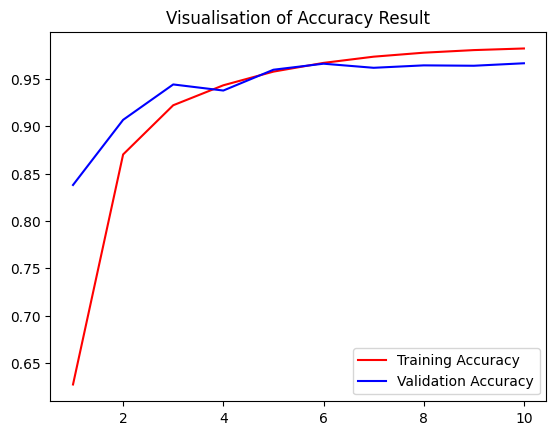

In [44]:
epochs =[i for i in range(1,11)]
plt.plot(epochs,training_history.history["accuracy"],color="red",label="Training Accuracy")
plt.plot(epochs,training_history.history["val_accuracy"],color="blue",label="Validation Accuracy")
plt.title("Visualisation of Accuracy Result")
plt.legend()
plt.show()

In [45]:
### Some Other Matrix for Model Evaluation 
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [46]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    data_format=None,
    
)

Found 17572 files belonging to 38 classes.


In [47]:
y_pred=model.predict(test_set)
y_pred

550/550 ━━━━━━━━━━━━━━━━━━━━ 98s 178ms/step


array([[9.9998009e-01, 5.7537846e-08, 2.4037849e-10, ..., 1.0495155e-13,
        3.1747449e-14, 4.9238451e-13],
       [9.4401067e-01, 3.9853351e-04, 2.3515923e-07, ..., 1.2213066e-09,
        9.6894073e-12, 1.4585848e-09],
       [1.0000000e+00, 6.2114314e-11, 1.3646781e-12, ..., 5.0097970e-18,
        1.1431250e-16, 3.8398134e-13],
       ...,
       [2.4322816e-11, 1.5891204e-14, 4.4670982e-09, ..., 1.9049324e-12,
        2.5755500e-12, 9.9999952e-01],
       [3.4730709e-09, 1.7696847e-12, 2.4159629e-08, ..., 1.0608483e-09,
        6.0324734e-10, 9.9999905e-01],
       [3.0763105e-20, 5.8010689e-21, 5.5027969e-17, ..., 3.2463695e-20,
        1.6916532e-17, 1.0000000e+00]], dtype=float32)

In [48]:
predicted_categories= tf.argmax(y_pred, axis=1)

In [49]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [50]:
true_categories= tf.concat([y for x,y in test_set],axis=0)
true_categories


<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [51]:
Y_true=tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [54]:
from sklearn.metrics import classification_report,confusion_matrix


In [53]:
classification_report(Y_true ,predicted_categories,target_names=class_name)

'                                                    precision    recall  f1-score   support\n\n                                Apple___Apple_scab       0.98      0.86      0.91       504\n                                 Apple___Black_rot       0.96      0.99      0.97       497\n                          Apple___Cedar_apple_rust       0.98      0.98      0.98       440\n                                   Apple___healthy       0.94      0.96      0.95       502\n                               Blueberry___healthy       0.98      0.98      0.98       454\n          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.98       421\n                 Cherry_(including_sour)___healthy       0.97      1.00      0.98       456\nCorn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.93      0.93       410\n                       Corn_(maize)___Common_rust_       1.00      0.98      0.99       477\n               Corn_(maize)___Northern_Leaf_Blight       0.95      

In [55]:
cm=confusion_matrix(Y_true,predicted_categories)
cm

array([[431,   9,   0, ...,   0,   1,   0],
       [  0, 492,   0, ...,   0,   0,   0],
       [  1,   0, 433, ...,   0,   1,   0],
       ...,
       [  0,   0,   0, ..., 487,   0,   0],
       [  0,   0,   0, ...,   0, 448,   0],
       [  0,   0,   1, ...,   0,   0, 475]], dtype=int64)

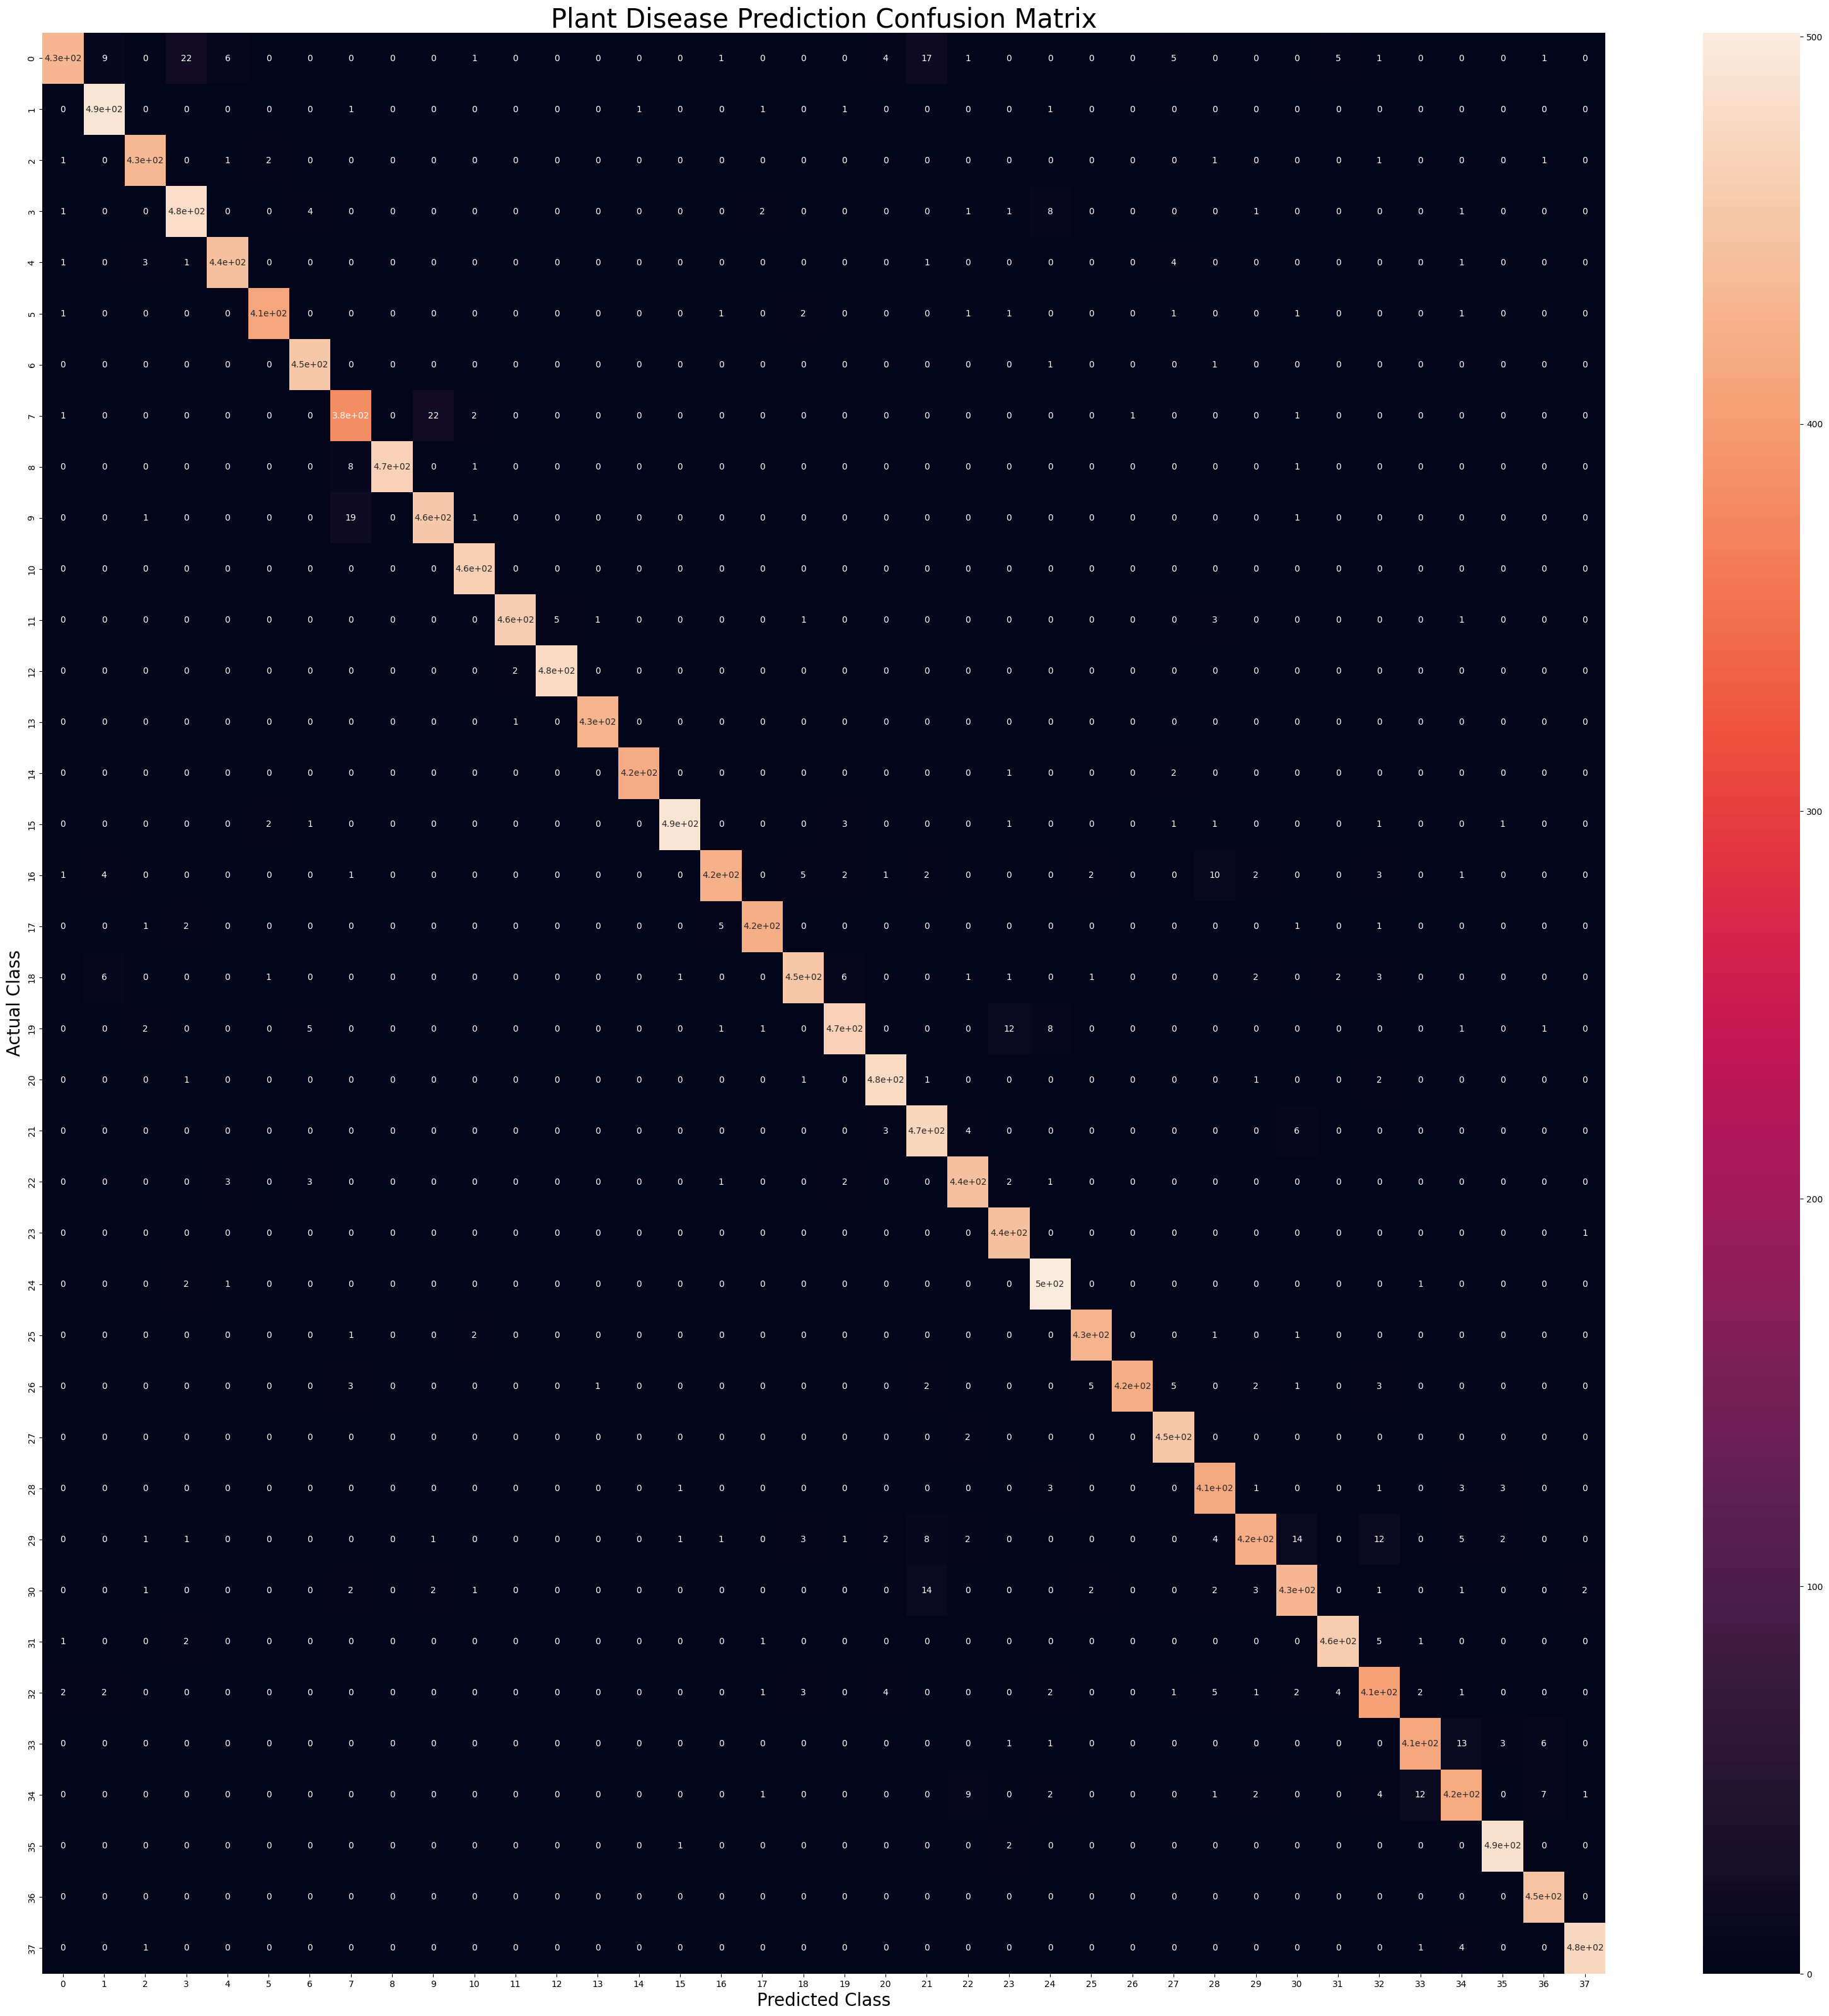

In [62]:
### Cponfusion Matrix Visualisation 
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted Class" , fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix" , fontsize=30)
plt.show()